# **NLP - Deep EDA of Disaster Tweets**

by Robin Munier

---

<br>


# **Introduction** <a id='introduction'></a>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In this competition, named ["Real or Not? NLP with Disaster Tweets"](https://www.kaggle.com/c/nlp-getting-started), we have a dataset of thousands of tweets hand classified as relating a disaster or not relating a disaster. The challenge is to predict which tweets are about real disasters.<br>
<br>
This notebook consists in an exploratory data analysis of the tweets.<br>
<br>
<br>
What will you find in this notebook ?<br>
*   An automatic cleaning of contractions.
*   An analysis of the keywords and locations related to disaster tweets and to non-disaster tweets. 
*   An analysis of the frequency of disaster by n-gram. Usually, people just look at n-gram occurences. But the fact a word appears in many disaster tweets do not mean it is linked to disasters as it can also appear in a lot of non-disaster tweets. Therefore, the frequency of disaster associated to each n-gram is an insightful metric.
*   An analysis of the impact of the counts of words, characters, stop words, URL, parts-of-speech taggings, dots, question marks, exclamation marks, and any punctuation marks frequent enough.
*   A look at the correlations of the precedent variables.
*   Visualizations of each effect.
*   Statistical tests and measures of effect sizes.
*   Several functions you can reuse for you own projects (to visualize data, to analyze frequencies of disasters, to perform statistical tests, etc.).
*   An explanation of some concepts of natural language processing, as tokenization, stop words, part-of-speech taggings, etc.
*   Detailed explanations of each part of the analysis.
*   A critical view of the analysis performed in this notebook.
*   Bibliographic references.

## **Table of content**
<br>

[Introduction](#introduction)<br>
[I. Preliminaries](#I)<br>
[II. Cleaning](#II)<br>
[III Keywords analysis](#III)<br>
[IV Locations analysis](#IV)<br>
[V Text analysis](#V)<br>
&nbsp;&nbsp;&nbsp;&nbsp; [V.1 N-grams occurrences](#V.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp; [V.2 Frequencies of disasters by n-grams](#V.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp; [V.3 Tweets lengths](#V.3)<br>
&nbsp;&nbsp;&nbsp;&nbsp; [V.4 Stop words](#V.4)<br>
&nbsp;&nbsp;&nbsp;&nbsp; [V.5 URL](#V.5)<br>
&nbsp;&nbsp;&nbsp;&nbsp; [V.6 Punctuation marks](#V.5)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.6.1 All punctuation marks](#V.6.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.6.2 Dots](#V.6.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.6.3 Exclamation marks](#V.6.3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.6.4 Question marks](#V.6.4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.6.5 Colons](#V.6.5)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.6.6 Ampersands](#V.6.6)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.6.7 Hyphens](#V.6.7)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.6.8 Slashes](#V.6.8)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.6.9 Asterisks](#V.6.9)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.6.10 Hashtags](#V.6.10)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.6.11 Mentions](#V.6.11)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.6.12 Underscores](#V.6.12)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.6.13 Apostrophes](#V.6.13)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.6.14 Conclusion](#V.6.14)<br>
&nbsp;&nbsp;&nbsp;&nbsp; [V.7 Part-of-speech tagging](#V.7)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.7.1 Plural common nouns](#V.7.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.7.2 Singular proper nouns](#V.7.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.7.3 Past tense verbs ](#V.7.3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.7.4 Past participle verbs](#V.7.4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.7.5 Non-3rd person singular present verbs](#V.7.5)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.7.6 Modals](#V.7.6)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.7.7 Personnal pronouns](#V.7.7)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.7.8 Possessive pronouns](#V.7.8)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.7.9 Adverbs](#V.7.9)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.7.10 Wh-adverbs](#V.7.10)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.7.11 Interjections](#V.7.11)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.7.12 Conclusion](#V.7.12)<br>
&nbsp;&nbsp;&nbsp;&nbsp; [V.8 Characters](#V.8)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.8.1 Uppercases](#V.8.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.8.2 Lowercases](#V.8.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.8.3 All characters](#V.8.3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.8.4 Start with uppercase](#V.8.4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [V.8.5 Conclusion](#V.8.5)<br>
&nbsp;&nbsp;&nbsp;&nbsp; [V.9 Correlations](#V.9)<br>
[VI. General Conclusion](#VI)<br>
[VII. Potential extensions](#VII)<br>
[VIII. Bibliographic references](#VIII)<br>

# **I. Preliminaries** <a id='I'></a>
<br>

Installation of some libraries.

In [ ]:
!pip install contractions

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sbn
import sys
import os
import re
import string
import scipy
from scipy.stats import chi2_contingency
from scipy.interpolate import interp1d
from statsmodels.stats.multitest import fdrcorrection, multipletests
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
import contractions
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize 
from nltk.tag import pos_tag

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

Let's display the versions for reproducibility.

In [ ]:
print("python", sys.version)
for module in np, pd, mpl, sbn, nltk, sk, nltk, re, scipy:
    print(module.__name__, module.__version__)

Initialisation of the random number generators.

In [ ]:
np.random.seed(0)

Data import.

In [ ]:
train = pd.read_csv('../input/nlp-getting-started/train.csv')
test = pd.read_csv('../input/nlp-getting-started/test.csv')
sample_submission = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

First of all, let's take a look at the training and test sets.

In [ ]:
pd.set_option('display.max_colwidth', None)

train.head()

In [ ]:
test.head()

In [ ]:
print("The training set has {} rows and {} columns.".format(train.shape[0], train.shape[1]))

In [ ]:
print("The test set has {} rows and {} columns.".format(test.shape[0], test.shape[1]))

Both the training set and the test set contain duplicates.

In [ ]:
print("The training set has {} duplicated rows.".format(train.drop('id',axis=1).duplicated(keep=False).sum()))

In [ ]:
print("The test set has {} duplicated rows.".format(test.drop('id',axis=1).duplicated(keep=False).sum()))

The training set contains some mislabellings. Indeed, some rows are differently labelled whereas they are identical. Some examples are available below.

In [ ]:
train[(train.drop(['id', 'target'], axis=1).duplicated(keep=False)) & ~(train.drop(['id'], axis=1).duplicated(keep=False))]

In [ ]:
train[train.text.str.contains('CLEARED:incident with injury:I-495')]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; One could want to relabel the mislabelled tweets. Nevertheless, when the same tweet is differently labelled on two different rows, we cannot know which are the true labels. Moreover, if the people who labelled them had different opinions about whether these tweeets were about real disasters, then we may want our models to take the existing ambiguity into account in order to be more effective. <br>
It is still worth noting the presence of these tweets because they can have a negative impact on the analysis. <br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In addition, it is likely that the same kind of mislabelling has been done on the test set. Thus, the scores on this competition could be evaluated with a dataset classifying differently identical rows (with all the predictors taking the same values). There is nothing we can do to overcome this difficulty since we cannot distinguish identical rows. This induces an irreducible error. <br>
<br>
Below are examples of duplicated rows in the test set that could have been mislabelled.

In [ ]:
test[(test.drop(['id'], axis=1).duplicated(keep=False))].iloc[:10,:]

Besides, some tweets have the same content but different locations or keywords. Here are some examples.

In [ ]:
train[(train['text'].duplicated(keep=False)) & ~(train.drop(['id','target'], axis=1).duplicated(keep=False))].sort_values(by="text")[10:20]

In [ ]:
print("There are {} such tweets.".format(train[(train['text'].duplicated(keep=False)) & ~(train.drop(['id','target'], axis=1).duplicated(keep=False))].shape[0]))

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The presence of the same tweets several times could be due to retweets. A retweet is the republishing of a post that another Twitter user has written.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Some duplicates could be caused by errors when collecting the data. Nevertheless, having no more information, we will keep all the duplicates (both duplicated rows or just duplicated tweets). Either way, this only involves a small part of the samples.<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Only the keyword and location features have missing values. Their porportion of missing values are respectively equal to 0.8% and 33.3% in the training set and to O.8% and 33.9% in the test set.

In [ ]:
print("{}% of the locations are missing in the training set and {}% in the test set".format(round(train.location.isnull().sum()/train.shape[0]*100, 1), round(test.location.isnull().sum()/test.shape[0]*100, 1)))
print("{}% of the keywords are missing in the training set and {}% in the test set".format(round(train.keyword.isnull().sum()/train.shape[0]*100, 2), round(test.keyword.isnull().sum()/test.shape[0]*100, 2)))

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Not all the users of the application allow Tweeter to show the location they are tweeting from. So the missing values of this feature are unsurprising. Here is more information about the location feature in tweeter : https://help.twitter.com/en/using-twitter/tweet-location <br>


In the training set, 43% of the tweets are about actual disasters.

In [ ]:
zeros = round((train.target==0).sum()/train.shape[0], 2)
ones = round(1-zeros, 2)

sbn.barplot(x=["Non disasters","Disasters"], y= [zeros,ones], color='gray')

plt.gca().set_ybound(0, 0.7)
plt.gca().set_ylabel('Proportion of tweets')
plt.gca().set_yticklabels([])

plt.gca().tick_params(axis='x')

plt.annotate(str(zeros)+'%', xy=(-0.1,zeros+0.01), size=15)
plt.annotate(str(ones)+'%', xy=(0.9,ones+0.01), size=15)
plt.suptitle('Distribution of disasters', size=15)
plt.show()

# **II. Cleaning** <a id='II'></a>
<br>

Before exploring the data, let's clean it up.<br>

Let's remove the URL from the tweets. Of course, we keep a copy of the original text variable for further analysis.

In [ ]:
remove_url = lambda x:re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", x)

train['original_text'] = train.text.copy()
train['text'] = train.text.apply(remove_url)

test['original_text'] = test.text.copy()
test['text'] = test.text.apply(remove_url)

Here are some examples of tweets before and after the URL removing.

In [ ]:
train.loc[train.text!=train.original_text, ['original_text', 'text']].head()

Next, we fix some errors that seem to be due to a change in the file format.

In [ ]:
def cleaning(data):
  data = data.apply(lambda x: re.sub(r'\x89Ûª', '\'', x))
  data = data.apply(lambda x: re.sub(r'&;amp;', '&', x))
  data = data.apply(lambda x: re.sub(r'&amp;', '&', x))
  data = data.apply(lambda x: re.sub(r'&amp', '&', x))
  data = data.apply(lambda x: re.sub(r'Û¢åÊ', '', x))
  data = data.apply(lambda x: re.sub(r'ÛÒåÊ', '', x))
  data = data.apply(lambda x: re.sub(r'Û_', '', x))
  data = data.apply(lambda x: re.sub(r'ÛÒ', '', x))
  data = data.apply(lambda x: re.sub(r'ÛÓ', '', x))
  data = data.apply(lambda x: re.sub(r'ÛÏ', '', x))
  data = data.apply(lambda x: re.sub(r'Û÷', '', x))
  data = data.apply(lambda x: re.sub(r'Ûª', '', x))
  data = data.apply(lambda x: re.sub(r'\x89Û\x9d', '', x))
  data = data.apply(lambda x: re.sub(r'Û¢', '', x))
  data = data.apply(lambda x: re.sub(r'åÈ', '', x))
  data = data.apply(lambda x: re.sub(r'åÊ', ' ', x))
  data = data.apply(lambda x: re.sub(r'å¨', '', x))
  data = data.apply(lambda x: re.sub(r'åÇ', '', x))
  data = data.apply(lambda x: re.sub(r'å_', '', x))
  return data

train.text = cleaning(train.text)
test.text = cleaning(test.text)

Here are some examples of corrections concerning the ampersands.

In [ ]:
train.loc[train.original_text.str.contains('&amp'), ['original_text', 'text']].head()

There are few spelling mistakes able to damage the descriptive analysis we will perform. So we won't spellcheck the tweets. <br>
If we wanted to spellcheck the tweets, we could for example use the "Speller" function from the [autocorrect](https://github.com/fsondej/autocorrect) library, in order to automate as much as possible. Nevertheless, we should be careful with such automating spellchecker as they sometimes try to correct proper nouns, creating other errors. <br> 
<br>
Now we will remove the contractions in the tweets by using the [contractions](https://github.com/kootenpv/contractions) package.

In [ ]:
vocabulary = set(train['text'].apply(lambda x: re.sub(r'[0-9]', '', x)).apply(lambda x:x.split()).sum())
vocabulary_test = set(test['text'].apply(lambda x: re.sub(r'[0-9]', '', x)).apply(lambda x:x.split()).sum())

print("The tweets from the traing set contain {} unique words (after removing the URL and the figures).".format(len(vocabulary)))
print("The tweets from the test set contain {} unique words (after removing the URL and the figures).".format(len(vocabulary_test)))

We create a dictionarry containing all

In [ ]:
contractions_detected = pd.DataFrame({word:[contractions.fix(word)] for word in vocabulary if word!=contractions.fix(word)}, index=['Corrections']).T
print("We detected {} differents contractions in the tweets from the traing set.".format(contractions_detected.shape[0]))

Below are 10 examples of detected contractions.

In [ ]:
contractions_detected[:10]

We apply these corrections to the training and test set.

In [ ]:
def check_contractions(w):
  if w in contractions_detected.index:
    return contractions_detected.loc[w, 'Corrections']
  else:
    return w

train.text = train.text.apply(lambda x: ' '.join([check_contractions(w) for w in x.split()]))
test.text = test.text.apply(lambda x: ' '.join([check_contractions(w) for w in x.split()]))

Examples of corrected tweets.

In [ ]:
train.loc[train.original_text.str.contains('theres'), ['original_text', 'text']]

In [ ]:
test.loc[test.original_text.str.contains('what\'s'), ['original_text', 'text']].head()

To finish, here is the correction of some spaces wrongly rendered in the keyword feature.

In [ ]:
train.loc[~train.keyword.isna(), 'keyword'] = train.loc[~train.keyword.isna(), 'keyword'].apply(lambda x: re.sub(r'%20', ' ', str(x)))
test.loc[~test.keyword.isna(), 'keyword'] = test.loc[~test.keyword.isna(), 'keyword'].apply(lambda x: re.sub(r'%20', ' ', str(x)))

# **III. Keywords** <a id='I'></a>

In [ ]:
print("The training set contains {} keywords. The rarest appears in {} tweets and the least rare in {} tweets. The keyword variable also contains {} missing values.".format(
    train.keyword.value_counts().shape[0], train.keyword.value_counts().min(), train.keyword.value_counts().max(), train.keyword.isna().sum()))

The 20 keywords the most frequent in the training set are given below. They give an idea about the content of this feature.

In [ ]:
groupby_keyword = train[['keyword', 'target']].groupby('keyword')['target'].agg(frequencies= 'mean', count = 'size').reset_index().sort_values(by='count', ascending=False)

sbn.barplot(y='keyword', x='count', data=groupby_keyword.iloc[:20], color='gray')
plt.gca().set_xlabel('Count')
plt.gca().set_ylabel('Keywords')
plt.suptitle("20 most occurring Keywords", size=15)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To study the word occurences in disaster tweets and then in non-disaster tweets would not be efficient to measure the impact of the keyword predictor. For instance, a keyword appearing numerous times in disaster tweets could also appear even more times in non-disaster tweets. Similarly, a keyword could occur few times in disaster tweets but even fewer in non-disaster tweets (and we should not trust too much the frequencies computed with rare keywords). So we cannot deduce the influence of a keyword from from its number of occurences. Consequently, to quantify the impact of each keyword, it is more efficient to compute the frequency of tweets relating disasters among those having this keyword.<br>
<br>
The 20 highest frequencies are given below.

In [ ]:
groupby_keyword.sort_values(by='frequencies', ascending=False, inplace=True)
sbn.barplot(y='keyword', x='frequencies', data=groupby_keyword.iloc[:20], color='gray')
plt.gca().set_xlabel('Frequency of disasters')
plt.gca().set_ylabel('Keywords')
plt.suptitle("20 highest frequencies of disaster by keyword", size=15)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The reliability of these results depends on the number of times each keyword occurs in the training set. 
If, for example, a keyword appeared in only one row but was associated with a disaster, then it would have a frequency of disaster equal to 100%. Nevertheless, this result would bring few information (as it would be particularly subject to sampling fluctuation, since it would concern just one tweet).

In [ ]:
print("The 20 keywords associated with the highest frequencies of disaster occur between {} and {} times with an average of {}.".format(groupby_keyword[:20]['count'].min(), 
                                                                                                                                        groupby_keyword[:20]['count'].max(), 
                                                                                                                                        groupby_keyword[:20]['count'].mean()))

Thus, care should be taken with the robustness of the previous results.<br>

It is still interesting to remark that all the tweets with the keywords "debris", "wreckage" or "derailment" are about actual disasters. This involves 115 rows.

In [ ]:
print("{} samples have 'debris', 'wreckage' or 'derailment' for keyword.".format(train.keyword.isin(['debris','wreckage', 'derailment']).sum()))

Here are the 20 lowest frequencies.

In [ ]:
sbn.barplot(y='keyword', x='frequencies', data=groupby_keyword.iloc[-20:], color='gray')
plt.gca().set_xlabel('Frequency of disasters')
plt.gca().set_ylabel('Keywords')
plt.suptitle("20 lowest frequencies of disaster by keyword", size=15)
plt.show()

Appart from the keyword "epicentre", occuring 12 times, every other keyword on the previous figure occurs at least 32 times.

In [ ]:
print("The 20 keywords associated with the lowest frequencies of disaster occur between {} and {} times with an average of {}.".format(groupby_keyword[-20:]['count'].min(), 
                                                                                                                                       groupby_keyword[-20:]['count'].max(), 
                                                                                                                                       groupby_keyword[-20:]['count'].mean()))

# **IV. Locations** <a id='IV'></a>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; One could argue that the location is a discriminant predictor as more than 90% of the locations are associated  with a frequency of disaster equal either to 0 or 1.

In [ ]:
groupby_location = train[['location', 'target']].groupby('location')['target'].agg(frequencies= 'mean', count = 'size').reset_index().sort_values(by='frequencies', ascending=False)
x = groupby_location.frequencies.apply(lambda x:np.round(x,1)).value_counts().index
y = groupby_location.frequencies.apply(lambda x:np.round(x,1)).value_counts()
y = y/np.sum(y)
y*=100

sbn.barplot(x=x, y=y, color='gray')
plt.gca().set_xlabel('Frequency of disasters')
plt.gca().set_ylabel('Proportion of locations')
plt.gca().set_yticklabels([])
plt.gca().set_xbound(-0.5, 11)
plt.gca().set_ybound(0, 65)

for i in range(11):
  plt.annotate(str(round(y.loc[i/10], 1))+'%', xy=(i-0.4,y.loc[i/10]+1), size=10)

plt.suptitle("Proportion of locations by frequency of disasters", size=15)
plt.show()

Nonetheless, most of the locations occur just one time in the training set (that is also true if we consider only the location having a frequency of disasters either equal to 0 or to 1). 

In [ ]:
x = groupby_location['count'].value_counts()[:10].index
y = groupby_location['count'].value_counts().to_numpy()
y = y[:10]/np.sum(y)
y *= 100

sbn.barplot(x=x, y=y, color='gray')
plt.gca().set_ylim([0, 100])
plt.gca().set_xlabel('Number of occurrences')
plt.gca().set_ylabel('Proportion of locations')

for i in range(10):
  plt.annotate(str(round(y[i], 1))+'%', xy=(i-0.3,y[i]+2), size=10)

plt.suptitle("Proportion of locations by number of occurrences in the training set", size=15)
plt.show()

In [ ]:
print("Besides, {}% of the locations appear more than 11 times in the training set.".format(round(100-np.sum(y), 1)))

Consequently, overall, the link between the location and the frequency of disaster is not very meaningful.<br>

An example of this is the case of New York. The location named "New York City" occurs 10 times and is labeled as a disaster with frequency 60%. Besides, "New York, NY" appears 15 times and have a frequency of disaster equal to 47%. The location "New York" characterized 71 tweets whose 23% are disasters. Finally, "NYC" is present 12 times and have a frequency of disaster equal to 17%. This example lays stress on the variability of the empirical link between a location and its frequency of disaster when we have few tweets from this location in the training set. In other words, we should not place too much hope on a pattern concerning a location present few times in the training set.<br>

However, some locations give more reliable indications. For instance, the location "USA" characterizes 104 tweets whose 64% are disasters. The more tweets a location characterizes, the more meaningful is the frequency of disasters among these tweets. Consequenly, we could for example aggregate all the tweets from New York, whatever the way the location is written.<br>

As an illustration, even if these values are not very meaningfull, below are a table presenting the locations that appear in at least 20 tweets.

In [ ]:
groupby_location[groupby_location['count']>=20]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Furthermore, it is also possible to visualize the link between the (keyword, location) pairs and the target variable. However, most of the locations are rare and the (keyword, location) pairs are even rarer. It is therefore unlikely that we deduce anything useful from this.<br>

For example, the most represented (keyword, location) pair is "sandstorm_USA". As shown below, it is present 17 times only and the 17 concerned tweets have the same text. So it does not bring useful informations.<br>

In [ ]:
keyword_location = train.copy()
keyword_location['keyword_location'] = keyword_location.keyword + '_' + keyword_location.location
pd.DataFrame(keyword_location.keyword_location.value_counts().reset_index().to_numpy(), columns=['(keyword, location) pairs', 'occurrences'])

In [ ]:
keyword_location[keyword_location.keyword_location=="sandstorm_USA"]

# **V. Text analysis** <a id='V'></a>
<br>

Let's now explore the text variable.

# **V.1 N-grams occurrences** <a id='V.1'></a>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We will first extract n-grams. N-grams are overlapping groups of multiple (from 1 to N) consecutive items. In general, the items can be phonemes, syllables, letters, words or something else, according to the application. Here, we will extract word based n-grams.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We call tokenization the process of breaking up text into different units. These units can be words, word-roots, characters, numbers, acronyms, n-grams or symbols. They are called tokens. Here, the text will be tokenized into words.<br>
<br>

Let's define two functions to compute and visualize the occurrences of n-grams.

In [ ]:
def ngram_occurrences(corpus=train.text, i=0, j=20, stop_words=None, ngram_range=(1, 1), tokenizer=None):
  
  """ Function to return a dataframe containing some chosen n-grams and, for each n-grams, the number of times it appear in the corpus. 
      The defaults values return a the barplot for the 20 most frequent n-grams.

        Parameters
        ----------
        corpus : Series (default=train.text)
            A Series containing the tweets.
        i : Integer (default=0)
            The minimum index of the n-grams to draw. The n-grams are sorted by number of occurrences (with the index starting at 0). So 0 stands for the most frequent n-gram, 
            1 for the second most frequent n-gram, etc.
        j : Integer (default=20)
            1 + the maximum index of the n-grams to draw. The n-grams are sorted by number of occurrences (with the index starting at 0). So j=20 stands for the 19th index, wich stands for the
             20th most frequent n-gram.
        stop_words : Iterable (default=None)
            If not None, the stop words to remove from the tokens.
        ngram_range : Tuple (min_n, max_n) (default=(1, 1))
            The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. All values of n such such that min_n <= n <= max_n will be used.
            For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.
        tokenizer : Tokenizer (default=None)
            If not None, a tokenizer to use instead of the default tokenizer.

        """  
  
  vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range, tokenizer=tokenizer).fit(corpus)
  document_term_matrix = vectorizer.transform(corpus)
  count = document_term_matrix.sum(axis=0) 
  ngram_count = [(word, count[0, id]) for word, id in vectorizer.vocabulary_.items()]
  ngram_count = sorted(ngram_count, key = lambda x: x[1], reverse=True)
  return pd.DataFrame(ngram_count[i:j], columns=['ngram', 'count'])

In [ ]:
def plot_ngram_occurrences(corpus=train.text, i=0, j=20, stop_words=None, n=1, tokenizer=None, add_title= ""):

  """ Function to display a barplot depicting the number of occurences for some chosen n-grams. The defaults values return a the barplot for the 20 most frequent n-grams.

        Parameters
        ----------
        corpus : Series (default=train.text)
            A Series containing the tweets.
        i : Integer (default=0)
            The minimum index of the n-grams to draw. The n-grams are sorted by number of occurrences (with the index starting at 0). So 0 stands for the most frequent n-gram, 
            1 for the second most frequent n-gram, etc.
        j : Integer (default=20)
            1 + the maximum index of the n-grams to draw. The n-grams are sorted by number of occurrences (with the index starting at 0). So j=20 stands for the 19th index, wich stands for the
             20th most frequent n-gram.
        stop_words : Iterable (default=None)
            If not None, the stop words to remove from the tokens.
        n : Integer (default=1)
            The kind of n-grams to consider. For example, 1 stands for unigrams, 2 for bigrams and 3 for trigrams.
        tokenizer : Tokenizer (default=None)
            If not None, a tokenizer to use instead of the default tokenizer.
        min_df : float in range [0.0, 1.0] or int (default=50)
            When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. 
            If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.
        add_title : String(default="")
            If not the empty string "", some string to add before the predefined title.
        
        """    
  
  ngram_count = ngram_occurrences(corpus, i, j, stop_words, (n, n), tokenizer)

  ylabel = 'Words'*int(n==1) + 'Bigrams'*(n==2) + 'Trigrams'*(n==3)

  sbn.barplot(x='count', y = 'ngram', data=ngram_count, color='gray')

  plt.yticks(size=12)
  plt.gca().set_xlabel('Count')
  plt.gca().set_ylabel(ylabel)

  plt.suptitle("{} occurrences ".format(ylabel) + add_title, size=15)
  plt.show()

Let's begin with unigrams, that is to say with single words. The following graph show the 20 most common words in the text variable of the traing set.

In [ ]:
plot_ngram_occurrences(add_title= "in the training set before removing stopwords")

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The most common words are stopwords. A stopword is a word used so frequently that the information of its presence (or absence) in a sentence is not meaningful. They are typically the kind of words we do not use with search engine because they are not discriminant. Example of stopwords are "the" or "a".<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Hence, to distinguish the most common meaningful words, let's remove the stopwords. Below is the same graph as previously, except that the occurrences are counted after removing the stopwords. There is no universally used list of stop words. Here, we will use the one provided by the nltk module of python.<br>

In [ ]:
stop_words = set(stopwords.words('english'))
plot_ngram_occurrences(train.text, stop_words=stop_words, add_title="in the training set after removing stopwords")

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The most common words are mainly neutral. Some are not very joyful. Examples are "fire", "disaster" or "emergency". Overall, these words could as well be used to talk about something harmless as to relate actual disasters. For instance, the word "fire" could be used to talk about candles, about the dismissal of an employee, or about a burning building.<br>
<br>
The results are very similar in the test set.

In [ ]:
plot_ngram_occurrences(test.text, stop_words=stop_words, add_title="in the test set after removing stopwords")

Subsequently, we will study the n-grams occurences specific to disaster tweets and to non-disaster tweets (from the training set).

In [ ]:
plot_ngram_occurrences(train.loc[train.target==1 ,'text'], stop_words=stop_words, add_title="in the disaster tweets")

The frequent vocabulary of the disaster tweets is dark ("suicide", "killed", "Hiroshima", "crash", etc.). On another side, the vocabulary of the non-disaster tweets is more positive, or at least more neutral. It includes in particular the word "love".<br>

In [ ]:
plot_ngram_occurrences(train.loc[train.target==0,'text'], i=2, stop_words=stop_words, add_title="in the non-disaster tweets")

Although there are more non-disasters tweets, their most frequent words appear approximately as many times as in disaster tweets. As we will see next, this fact is not due to a greater number of words in the disaster tweets.<br>
<br>
Now let's explore the bigrams, that is to say pairs of successive words.

In [ ]:
plot_ngram_occurrences(train.loc[train.target==1 ,'text'], stop_words=stop_words, n=2, add_title="in the disaster tweets")

In [ ]:
plot_ngram_occurrences(train.loc[train.target==0,'text'], stop_words=stop_words, n=2, add_title="in the non-disaster tweets")

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Once more, the vocabulary of the disaster tweets is more violent, with the recurrence of the word "bomb" (or "bomber" and "bombing"), for instance. If we did not know wich chart described the distribution of bigrams among the disaster tweets, it would not be hard to guess (as an example, I showed the two previous graphs without titles and captions to a friend and she quickly guessed which one was about real disasters).<br>
<br>

Furthermore, overall, the bigrams counts are larger in disaster tweets (although there are more non-disaster tweets).

In [ ]:
print("As an illustration, {} bigrams appear more than 25 times in disaster tweets, against only {} in non-disaster tweets.".format(
    (ngram_occurrences(train.loc[train.target==1,'text'], stop_words=stop_words, ngram_range=(2,2))['count']>25).sum(),
    (ngram_occurrences(train.loc[train.target==0,'text'], stop_words=stop_words, ngram_range=(2,2))['count']>25).sum()))

The exploration of trigrams confirms the precedent observation.

In [ ]:
plot_ngram_occurrences(train.loc[train.target==1,'text'], stop_words=stop_words, n=3, add_title="in the disaster tweets")

In [ ]:
plot_ngram_occurrences(train.loc[train.target==0,'text'], stop_words=stop_words, n=3, add_title="in the non-disaster tweets")

In [ ]:
print("As an illustration, {} trigrams appear more than 25 times in disaster tweets, against only {} in non-disaster tweets.".format(
    (ngram_occurrences(train.loc[train.target==1,'text'], j=None, stop_words=stop_words, ngram_range=(3,3))['count']>20).sum(),
    (ngram_occurrences(train.loc[train.target==0,'text'], j=None, stop_words=stop_words, ngram_range=(3,3))['count']>20).sum()))

So the disaster tweets tend to contain the same trigrams, in contrast to non-disaster tweets.<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; That suggests that the way the user of Tweeter talk about real disasters is more uniform. That is coherent with the assumption that, when people tweet about a real disaster, they pay probably more attention to the words they use in order to respect the pain of the victims and their loved ones. In addition, when the information of a disaster is confirmed by reliable media, it is tempting to reuse official terms (i.e unigrams) and expressions (i.e bigrams and trigrams) so as not to be imprecise.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; On the contrary, when people tweet about contingent disasters, or about something that has nothing to do with disasters, it is likely that each one express its own opinion with its own words. That would explain the diversity of the expressions used in non disaster tweets.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Moreover, it is likely that tweets about real disasters buzz more than others. Thus, numerous disaster tweets from our dataset deal with the same topics. Consequently, the vocabulary of these tweets appear more often. On the other hand, each non-disaster tweet can evoke a specific topic, associated to a specific vocabulary.<br>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Besides, the most common n-grams of the disaster tweets contain more past forms (as "detonated", "devastated', "razed", "confirmed", etc.). The usage of past forms suggests the disasters actually happened.<br>
On the contrary, the non-disaster tweets evoke feelings and contingencies, particularly with the bigrams "feel like", "looks like".<br>
We also remark the presence of website names ("ebay", "youtube", "reddit") in the non-disaster tweets.<br>
<br>


# **V.2 Frequencies of disasters by n-gram** <a id='V.2'></a>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The presence of words (or n-grams) in disaster tweets do not mean they characterize the disaster tweets because they can also appear often in non-disaster tweets as well. Moreover, there are not as many disaster tweets as there are than non-disaster tweets, what further complicates the interpretation of words occurrences. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A word characterizes the disaster tweets if it appears almost exclusively in disaster tweets. Consequently, for each word, we will compute the number of disaster tweets in which it appears divided by the total number of tweets in which it appears. For each word, the obtained value corresponds to the frequency of disaster tweets among all the tweets containing (at least one time) this particular word. Of course, this computation can only be done on the training set as we need to know which tweets are about real disasters to achieve it.<br>
<br>
We first define two convenient functions.

In [ ]:
def disaster_frequency_by_ngram(corpus=train.text, i=0, j=20, stop_words=None, ngram_range=(1, 1), tokenizer=None, min_df=50):

  """ Function to return a dataframe containing some chosen n-grams and, for each n-grams, the frequency of disaster among the tweets containing this n-gram. The defaults values return a dataframe 
      containing the n-grams associated to the 20 highest frequencies of disaster and their frequencies.

        Parameters
        ----------
        corpus : Series (default=train.text)
            A Series containing the tweets.
        i : Integer (default=0)
            The minimum index of the n-grams to draw. The n-grams are sorted by frequency of disaster (with the index starting at 0). So 0 stands for the n-gram with the highest frequency, 
            1 for one with the second highest frequency, etc.
        j : Integer (default=20)
            1 + the maximum index of the n-grams to draw. The n-grams are sorted by frequency of disaster (with the index starting at 0). So j=20 stands for the 19th index, wich stands for the
             n-gram with the 20th highest frequency.
        stop_words : Iterable (default=None)
            If not None, the stop words to remove from the tokens.
        ngram_range : Tuple (min_n, max_n) (default=(1, 1))
            The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. All values of n such such that min_n <= n <= max_n will be used.
            For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.
        tokenizer : Tokenizer (default=None)
            If not None, a tokenizer to use instead of the default tokenizer.
        min_df : float in range [0.0, 1.0] or int (default=50)
            When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. 
            If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.
        
        """

  vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range, tokenizer=tokenizer, min_df=min_df, binary=True).fit(corpus)
  document_term_matrix = vectorizer.transform(corpus)
  count = document_term_matrix.sum(axis=0) 
  frequency_by_ngram = document_term_matrix[train.target.to_numpy()==1,:].sum(axis=0)/count 
  ngram_freq_count = [(word, frequency_by_ngram[0, id], count[0, id]) for word, id in vectorizer.vocabulary_.items()]
  ngram_freq_count = sorted(ngram_freq_count, key = lambda x: x[1], reverse=True)
  return pd.DataFrame(ngram_freq_count[i:j], columns=['ngram', 'disaster_frequency', 'count'])

In [ ]:
def plot_disaster_frequency_by_ngram(corpus=train.text, i=0, j=20, stop_words=None, n=1, tokenizer=None, min_df=50, add_title= ""):
  
  """ Function to display a barplot depicting the frequency of disaster for some chosen n-grams. The defaults values return a the barplot for
      the n-grams associated to the 20 highest frequencies of disaster.

        Parameters
        ----------
        corpus : Series (default=train.text)
            A Series containing the tweets.
        i : Integer (default=0)
            The minimum index of the n-grams to draw. The n-grams are sorted by frequency of disaster (starting at 0). So 0 stands for the n-gram with the highest frequency, 
            1 for one with the second highest frequency, etc.
        j : Integer (default=20)
            1 + the maximum index of the n-grams to draw. The n-grams are sorted by frequency of disaster (starting at 0). So j=20 stands for the 19th index, wich stands for the
            n-gram with the 20th highest frequency.
        stop_words : Iterable (default=None)
            If not None, the stop words to remove from the tokens.
        n : Integer (default=1)
            The kind of n-grams to consider. For example, 1 stands for unigrams, 2 for bigrams and 3 for trigrams.
        tokenizer : Tokenizer (default=None)
            If not None, a tokenizer to use instead of the default tokenizer.
        min_df : float in range [0.0, 1.0] or int (default=50)
            When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. 
            If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.
        add_title : String(default="")
            If not the empty string "", some string to add before the predefined title.
        
        """  

  ngram_count = disaster_frequency_by_ngram(corpus, i, j, stop_words, (n, n), tokenizer, min_df=min_df)

  ylabel = 'Words'*int(n==1) + 'Bigrams'*(n==2) + 'Trigrams'*(n==3)

  sbn.barplot(x='disaster_frequency', y = 'ngram', data=ngram_count, color='gray')
  plt.yticks(size=12)
  plt.gca().set_xlabel('Frequency of disaster tweets')
  plt.gca().set_ylabel(ylabel)

  plt.suptitle(add_title + " frequencies of disaster by {} ".format(ylabel.lower()), size=15)
  plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A word that appears in just one or two tweets can easily have a frequency of apparition in disaster tweets equal to 1. Nonetheless, such words are not relevant for our analysis as they bring no reliable information. Reliable information comes from recurrences. Thus, we only consider the words occurring in at least 50 tweets in the computations.

In [ ]:
plot_disaster_frequency_by_ngram(stop_words=stop_words, add_title="Highest")

In [ ]:
plot_disaster_frequency_by_ngram(i=-20, j=None, stop_words=stop_words, add_title="Lowest")

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; This corroborates our previous observations as the words associated to the lowest frequencies of disasters relate feelings ("love", "lol", "feel", "want", "good") and contingencies ("think", "god"). 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Moreover, the words associated to the highest frequencies of disasters contain past forms ("killed", "found"), unlike the ones associated with the lowest frequencies (except "let" that can be a past form). In addition, the words associated with high frequencies of disasters (such as "bomber", "atomic", "killed", "suicide") are darker than the ones associated with low frequencies (such as "full", "body" or "lol", that are neutral or joyful).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We can also explore the frequency of disaster by bigram. However, even the most frequent bigrams remain rare. So we have to consider bigrams occurring in much less than 50 tweets to have something to explore.<br> 
The chart below show the 20 bigrams with the highest frequencies of disaster, among the bigrams that appear in at least 25 tweets of the training set.

In [ ]:
plot_disaster_frequency_by_ngram(n=2, stop_words=stop_words, min_df=25, add_title="Highest")

The next one shows the bigrams ranked from 20 to 40 according to this same criteria.

In [ ]:
plot_disaster_frequency_by_ngram(i=20, j=40, n=2, stop_words=stop_words, min_df=25, add_title="From 20 to 40 highest")

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Most of these bigrams appear in tweets dealing with the same topics. So these two previous charts inform us more about the topics of the disasters from our training set (a declaration of Barack Obama about a typhoon that devastated Saipan, the Malaysia Airlines Flight 370 that disappeared, more than 40 families affected by the fatal outbreak of Legionnaires, etc.) than about the words that characterize the disaster tweets in general.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Nevertheless, the exploration of the frequencies of disasters by bigrams give us another information. More bigrams appear often in disaster tweets than in non-disaster tweets. Indeed, the below graph prove that few bigrams are associated to a low frequency of disasters. For example, among the bigrams that appear at least 25 times in the training set, only 4 appear less than 10% of the time in disaster tweets while 35 appear more than 90% of the time in disaster tweets.<br>

In [ ]:
plot_disaster_frequency_by_ngram(i=-20, j=None, n=2, stop_words=stop_words, min_df=25, add_title="Lowest")

First, that is a consequence of the greater uniformity of words and expressions used in disaster tweets. <br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We can deduce that, although some n-grams clearly characterize disaster tweets, few n-grams characterize non-disaster tweets. To simplify, the n-grams present in non-disaster tweets also appear in disaster tweets. But some n-grams appear almost exclusively in disaster tweets. <br>
Of course, the last statement only consider the bigrams appearing at least 25 times. Some n-grams appear only in non-disaster tweets. But they occur too few times so that we can infer anything trustworthy from them.<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The following chart shows all the trigrams which appear in at least 25 tweets. It is self-explanatory and it confirms even more clearly the previous observation.

In [ ]:
plot_disaster_frequency_by_ngram(i=0, j=None, n=3, stop_words=stop_words, min_df=25, add_title="All")

# **V.3 Tweet lengths** <a id='V.3'></a>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We will now explore the impact of the tweet length. The tweet length will be measured by the number of words by tweet. To be more precise, it will be measured by the number of tokens while the used tokenization process consist in removing punctuation and splitting the tokens on whitespaces.<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Note that the tweet length is measured after removing the URL and the punctuation marks as the effects of the punctuation and the number of URL in tweets will be studied later.

In [ ]:
train['tweet_lengths'] = train.text.apply(lambda x:x.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))) # Remove punctuation
train['tweet_lengths'] = train['tweet_lengths'].apply(lambda x: len(x.split()))

In [ ]:
def print_quick_stats(x, units):
  """ Function to compute simple statistics on a feature x (given as the argument of the function). """
  
  print("In the training set, the tweets contain from {} to {} {}, with an average of {} and a standard deviation equal to {}.".format(train[x].min(), train[x].max(), units,
                                                                                                                                       round(train[x].mean(), 1), round(train[x].std(), 1)))

In [ ]:
x = 'tweet_lengths'
units = "words"
print_quick_stats(x, units)

In [ ]:
def groupby_x(x):
  """ Function that return a dataframe with two columns. The first one contains each unique value taken by a feature x (given as the argument of the function).
      The second one contains the average frequency of disaster for each unique value of x. """

  return train[[x,'target']].groupby(x)['target'].agg(frequency= 'mean').reset_index()

In [ ]:
def plot_disaster_frequency_by_x(x, groupby_x, title="(with 95% confidence interval)", vline=True, annotate=False, xlim=None, data=train):

  """ Function to plot a linear interpolation of the frequencies of disaster for each value taken by a given feature x. 
      Besides, an horizontal line is drawn on top of this graph to indicate the average frequency of disaster through all the training set.

        Parameters
        ----------
        x : String
            The name of the feature according to which we compute the frequencies of disaster.
        groupby_x : DataFrame
            A dataframe containing the average frequency of disaster for each value of x.
        title : String (default="(with 95% confidence interval)")
            A title that is used in addition to the suptitle of the graph.
        vline : Boolean (default=True)
            Whether to plot a vertical line at each intersection point between the interpolation curve of frequencies and the horizontal line equal to the average frequency among all the training set.
        annotate : Boolean (default=False)
            Whether to display the abscissa of the intersection point where the vertical lines are plotted.
        xlim : Tuple (default=None)
            The limits of the x-axis.
        data : DataFrame (default=train)
            The dataframe to which the feature x belongs.
        
        Display
        -------
        
        - A linear interpolation of the frequencies of disaster for each value taken by a given feature x.
        - An horizontal line indicating the average frequency of disaster through all the training set.
        - Optionally : a vertical line at each intersection point between the interpolation curve of frequencies and the horizontal line
        
        """

  sbn.lineplot(x=x, y='target', data=data, color='gray')

  z = groupby_x[x].to_numpy()
  y = groupby_x.frequency.to_numpy()
  args = np.linspace(z.min(), z.max(), 2000)
  f = interp1d(z, y).__call__(args)
  g = interp1d(z, data.target.mean()*np.ones(shape=z.shape)).__call__(args)
  idx = np.argwhere(np.diff(np.sign(f - g))).flatten()

  plt.axhline(y=data.target.mean(), color='red')
  plt.plot(args[idx], f[idx], 'ro', markersize=4)

  plt.gca().set_xlim(xlim)

  locs, labels = plt.yticks()
  norm_cst = min(np.max(locs), 1)

  if vline:
    if annotate:  
      for i in idx:
        plt.axvline(x=args[i], ymax=f[i]/norm_cst, color='red', linestyle='dashed')
        plt.annotate(str(round(args[i],1)), xy=(args[i]+0.05, -0.03), color='red')
    else:
      for i in idx:
        plt.axvline(x=args[i], ymax=f[i]/norm_cst, color='red', linestyle='dashed')

  plt.gca().set_xlabel(" ".join(x.split(sep='_')).capitalize())
  plt.gca().set_ylabel('Frequency of disasters')
  plt.suptitle('Frequency of disasters by ' + " ".join(x.split(sep='_')), size=15)
  plt.title(title)
  plt.show()

The following chart displays a linear interpolation of the frequencies of disasters for each fixed length of tweet. <br>
Besides, an horizontal line is drawn on top of this graph to indicate the average frequency of disaster through all the training set. In addition, vertical lines are drawn at each intersection point between the interpolation curve of frequencies and the horizontal line. They enable to distinguish for which tweet length the frequency of disasters is above or below the average frequency.<br>
Thereafter, we will study other charts like this one without explaining this again.

In [ ]:
plot_disaster_frequency_by_x(x=x, groupby_x=groupby_x(x))

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The tweet length goes from 1 to 32 words. In general, the tweets containing between 7 and 22 words deal more frequently with real disasters than the average. The ones with a length inferior to 7 or superior to 22 are less likely to concern real disasters.<br>
Thus, the tweets with medium length are more often about disasters than the short ones and the long ones.<br>
<br>
In general, when somebody tweet about a disaster, he uses enough words to be precise while remaining concise.<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Most of the tweets have a medium length (associated with a frequency of disasters a little higher than the average) and a small portion of tweets are particularly long or particularly short (and associated with a frequency of disasters much lower than the average). That is why the 95% confidence interval is thinner for medium lengths. This is illustrated by the distribution of the tweet lengths.

In [ ]:
def distribution(x, bins=None, data=train):

  """ Function to plot an histogram depicting the distribution of a feature x of the training set (with a gaussian kernel density estimate).

        Parameters
        ----------
        x : String
            The name of the feature whose the distribution will be plotted.
        bins : Integer (default=None)
            The number of bins we want the histogram to have.
        data : DataFrame (default=train)
            The dataframe to which the feature x belongs.            
        """  

  sbn.distplot(data[x], color='gray', kde=True, bins=bins)
  plt.gca().set_xlabel(" ".join(x.split(sep='_')).capitalize())
  plt.gca().set_ylabel('Proportion')
  plt.suptitle("Distribution of " + " ".join(x.split(sep='_')), size=15)
  plt.title("(with a gaussian kernel density estimate)")
  plt.show()

In [ ]:
distribution(x, bins=31)

In [ ]:
print("{}% of tweets contain less than 7 words or more than 22.".format(round(100*train[(train.tweet_lengths<7) | (train.tweet_lengths>22)].shape[0]/train.shape[0], 1)))

Let's try to explain why the frequency of disaster tweets is lower among the tweets with particularly short or long lentghs. Below are examples of tweets including less than 7 words.

In [ ]:
train[train.tweet_lengths<7][:20]

Short tweets generally describe a feeling or communicate a succint information. Examples of feelings are "I love fruits", "Summer is lovely", "this is ridiculous....", "London is cool ;)" or "Love skiing". An example of concise information is "Wholesale Markets ablaze". Besides, some short tweets can be also seen as communicating an information while depicting a feeling. An example is "My car is so fast". Although some tweets consisting in a succint information concern real disasters, tweets depicting feelings rarely concern real disasters.
Thus, overall, short tweets concern less frequently actual disaster.

Now, let's take a look at tweets including more than 22 words.

In [ ]:
train[train.tweet_lengths>22][:15]

An explanation of why the long tweets concern less frequently real disasters than medium ones is that most of them are anecdotes or jokes. Some are also quotes of famous people. On another hand, some deal with real disasters with many words. But, generally, tweeters seem to use more words to talk about their own stories or to interject humour than to evoke disasters.

Finally, here are examples of medium length tweets.

In [ ]:
train[(train.tweet_lengths>7) & (train.tweet_lengths<22)][:15]

These last samples are self explanatory. The medium length tweets are more diverse. Moreover, as stated before, tweeters tend generally to write about disaster with medium length tweets. In general, they seem to be more serious and neutral than short tweets and long tweets.<br>
<br>
Our precedent computation of the tweet lengths considered the stop words. To remove the stop words and recompute the length lead to a similar interpretation.

In [ ]:
x = 'tweet_lengths_without_stopwords'
stop_words = set(stopwords.words('english'))
train[x] = train.text.apply(lambda x:x.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))) # Remove punctuation
train[x] = train[x].apply(lambda x: len(set(x.lower().split()).difference(stop_words)))

distribution(x)

Once the stop words removed, the tweet are all shorter.

In [ ]:
print("The {} tweets with a length superior to 22 have an average length equal to {} once the stop words are removed.".format((train.tweet_lengths>22).sum(), train.loc[train.tweet_lengths>22, 
                                                                                                                              'tweet_lengths_without_stopwords'].mean()))

In [ ]:
plot_disaster_frequency_by_x(x, groupby_x(x))

Hence, once the wtop words are removed, the tweets with a lentgh inferior to 7 have a low frequency and the others have a frequency above the average. After removing the stop words, we do not observe anymore the presence of long tweets with a low frequency. Those are now mixed with medium length tweets. This reduces sightly the higher frequencies observed among medium length tweets. <br>
<br>

# **V.4 Stop words** <a id='V.4'></a>
<br>

Let's now see what we can deduce from the number of stop words in the tweets.

In [ ]:
x = 'stopwords_count'
units = 'stop words'
stop_words = set(stopwords.words('english'))
train[x] = train.original_text.apply(lambda x: len(set(x.lower().split()).intersection(stop_words)))

print_quick_stats(x, units)

In [ ]:
plot_disaster_frequency_by_x(x=x, groupby_x=groupby_x(x), annotate=True)

Roughly, the frequency of disaster tends to decrease when the usage of stop words increases.<br>
Between 0 and 5 stop words, the frequency of disaster is above the average. <br>
Between 5 and 7, it is approximately equal to the average.<br>
Between 7 and 14, it decreases a lot. <br>
The peak of frequency at 15 stop words is due to the fact it is computed on just 3 samples. So it is untrustworthy

In [ ]:
def marginal_tweets_count(x, units, level):
  print('Only {} tweets contain more than {} {}.'.format((train[x]>level).sum(), level, units))

marginal_tweets_count(x, units, 14)

More generally, the uncertainty about these results increases with the number of stop words in the tweets. Indeed, few samples contain many stop words. That is illustrated with the distribution of stop words count in tweets. And the lower the number of samples used to compute the frequency, the greater the uncertainty.

In [ ]:
distribution(x)

To conclude, the frequency of disasters decreases when the count of stop words increases.<be>
<br>
<br>

# **V.5 URL study** <a id='V.5'></a>

In [ ]:
x = 'URL_count'
units = 'URL'
train[x] = train.original_text.apply(lambda x : len(re.findall("https?:\/\/t.co\/[A-Za-z0-9]+", x)))

print_quick_stats(x, units)

In [ ]:
def distribution_annotated(x, xaxis=range(train[x].max()+1), data=train):

  """ Function to plot an histogram depicting the distribution of a feature x of the training set, with the values directly annotated on the bars.

        Parameters
        ----------
        x : String
            The name of the feature whose the distribution will be plotted.
        xaxis : Iterable (default=train[x].max()+1)
            The values of the x-axis.
        data : DataFrame (default=train)
            The dataframe to which the feature x belongs.            
        """    

  groupby = data[[x, 'target']].groupby(x)['target'].agg(count= 'size').reset_index()
  z = groupby.loc[groupby[x].isin(xaxis), x]
  y = groupby.loc[groupby[x].isin(xaxis), 'count']/groupby['count'].sum()
  y*=100

  sbn.barplot(x=z, y=y, color='gray')
  plt.gca().set_yticklabels([])
  plt.gca().tick_params(axis='x', labelsize=12)
  plt.gca().set_ylim((0, max(y)+10))
  plt.gca().set_xlabel(" ".join(x.split(sep='_')).capitalize())
  plt.gca().set_ylabel('Proportion of tweets')

  for i in xaxis:
    plt.annotate(str(round(y.loc[i], 1))+'%', xy=(i-0.4, y.loc[i]+1), size=10)
  
  plt.suptitle('Distribution of '+ " ".join(x.split(sep='_')), size=15)
  plt.show()

In [ ]:
distribution_annotated(x)

In [ ]:
plot_disaster_frequency_by_x(x=x, groupby_x=groupby_x(x))

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The tweets with 1 or 2 url tend to relate disasters more often than the ones without any URL. However, the confidence we have in the empirical frequencies computed for the tweets with 3 or 4 URL is low.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Hence, the frequencies of disasters computed for the tweets with 3 or 4 URL are not reliable. Consequently, instead of studying the relationship between the frequency and the number of URL, we can gather all the tweets with at least one URL in a single group and simply analyse the relationship between the frequency of disaster and the presence of URL in a tweet. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; As many variables have this kind of distribution, this approach will be used many times later in this notebook, without explaining why again.<br>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  To check if the impact of the presence of URL is due to sampling fluctuation, we can use a chi-squared test of independence between the target variable and an indicator variable taking the value 1 for the tweets with URL and 0 for the others. I gave a detailed explanation of chi-squared tests of independence, adressing the Cochran's criterion and the multiple testing problem, in [this previous notebook](https://www.kaggle.com/robinmunier/categorical-feature-encoding-challenge-ii). So the reader is assumed to understand the following lines of code and the results (otherwise, just check my previous notebook).

In [ ]:
def cochran_criterion(crosstab):
  """ Function taking as argument a contingency table and returning a boolean indicating whether the Cochran's criterion (which checks the validity for a chi-squared test) 
      is satisfied for this table. """
  N = crosstab.sum().sum()
  E = [O_i*O_j/N > 4 for O_i in crosstab.sum(axis=1) for O_j in crosstab.sum()]
  criterion = (0 not in set(crosstab.to_numpy().reshape(-1))) & (np.mean(E)>=0.8)
  return criterion

def chi2_test(X,Y):
  """ Function taking two variables as arguments and returning a list of results about a chi-squared test of independence between these two variables. The list of results
      contains a boolean indicating whether the Cochran's criterion is satisfied, the test statistic, the p-value of the test, and a boolean indicating whether the
      test is statistically significant (i.e the Cochran's critetion is satisfied and the p-value is under 5%). """
  crosstab = pd.crosstab(X, Y)
  criterion = cochran_criterion(crosstab)
  chi2, p = chi2_contingency(crosstab)[:2]
  statistically_significative = criterion & (p<0.5)
  return [criterion, chi2, p, statistically_significative]

def cohen_d(x,y):
    """ Function taking two variables as arguments and returning the Cohen's d computed between them as well as a string indicating the nature of the measured effect
        ("Positive" or "Negative"). This string indicates which of the two variables x and y has the greatest average ("Negative" means it is x and "Positive" means it is y). """
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    value = (np.mean(y) - np.mean(x)) / np.sqrt(((ny-1) * np.std(y, ddof=1)**2 + (nx-1) * np.std(x, ddof=1)**2) / dof)
    effect = "Positive"*(np.sign(value)==1) + "Negative"*(np.sign(value)==-1)
    return np.abs(value), effect

def chi2_test_with_effect_size(x, threshold=0):
  """ Function taking as argument the name of a feature of the training set and a threshold. It returns the list of results provided by the cohen_d function appended to
      the one provided by the chi2_test function, where both of these functions are feeded with the target variable and an indicator variable taking value 0 or 1
      according to the exceeding of the given threshold by the given feature. """
  values = chi2_test(X = (train[x]>threshold).apply(int), Y = train.target)
  values.extend(cohen_d(train[train[x]<=threshold].target, train[train[x]>threshold].target))
  return values

chi2_tests = pd.DataFrame(columns=['Cochran_criterion', 'Chi2', 'p_value', 'Statistically_significative', 'Cohen_d', 'Effect' ])
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
chi2_tests 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The p-value of the chi-squared test of independence is particularly low. In addition, the Cochran criterion is satisfied. So we conclude in a statistically significant way (at level 5%) that the URL presence impacts the propensity of tweets to relate real disasters.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Warning! Do not confuse statistical significance and practical significance. A statistically significant result may have a weak effect. In that case, the result is statistically significant but not practically significant. <br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; An example of effect size measure is the [Cohen's d](https://en.wikipedia.org/wiki/Effect_size#Cohen's_d). It is defined as the difference between the two means divided by a weighted average of the standard deviations of each group (the formula is clear from the code). That makes sense since greater are the standard deviations of the frequencies in the two groups, more chance there is we observe an effect due to sampling fluctuation. <br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The previous table show that the effect size of the presence of URL, as measured by the Cohen's d, is equal to 51%. This Cohen's d can be interpreted as a medium measure of the effect size.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Below is a table providing rough interpretations of orders of magnitude of Cohen's d values. 

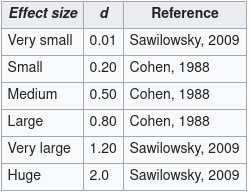

The nature of the effect is given in the last columns of the dataframe. "Negative" means the presence of exclamation marks has a negative impact on (or is negatively correlated to) the frequency of disasters.<br>
<br>

# **V.6 Punctuation marks** <a id='V.6'></a>

# **V.6.1 All punctuation marks** <a id='V.6.1'></a>

In [ ]:
x = 'punctuation_marks_count'
units = 'punctuation marks'
train[x] = train['text'].apply(lambda x: len([w for w in x if w in string.punctuation]))

print_quick_stats(x, units)

In [ ]:
distribution(x, bins=62)

In [ ]:
marginal_tweets_count(x, units, 25)

Hence, for more visibility, the following chart does not display the tweets with more than 25 punctuation marks.

In [ ]:
plot_disaster_frequency_by_x(x=x, groupby_x=groupby_x(x), xlim=(0,25), vline=False)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Roughly, the frequency is equal to the average for the tweets with 0 to 11 punctuation marks. Beyond 11 punctuation marks, there is no real trend and there are not enough tweets to conclude anything reliable. The frequency is then volatile and untrustworthy (hence the width of the 95% confidence interval).<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; It seems reasonable to think that tweets concerning real disasters are written with a better language level, paying more attention to punctuation, unlike most tweets which only use exclamation marks (!), ats (@) or hashtags (#) for punctuation.<br>
Consequently, let's explore the relationships between disasters and some individual punctuation marks (like dots or exclamation marks). <br>
<br>
First, here are the counts of each punctuation mark in the training set.

In [ ]:
punctuation_marks_count = {}
for p in string.punctuation:
  punctuation_marks_count[p] = [train['text'].apply(lambda x: len([w for w in x if w in p])).sum(), train['text'].apply(lambda x: int(len([w for w in x if w in p])>0)).sum()]

punctuation_marks_count = pd.DataFrame(punctuation_marks_count, index=['count', 'tweets_concerned']).sort_values(by='count', axis=1)
punctuation_marks_count

Some punctuation marks are very rare, so we cannot extract reliable informations from their study. We will focuse on the others.<br>
<br>

# **V.6.2 Dots** <a id='V.6.2'></a>

In [ ]:
x = 'dots_count'
units = 'dots'
train[x] = train['text'].apply(lambda x: len([w for w in x if w in '.']))

print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(10))

For more visibility, the latest chart did not display the porportions of tweets having 10 or more dots. Indeed, few tweets contain more than 9 dots. The same visualization choice has been done later in the notebook without further explanation.

In [ ]:
marginal_tweets_count(x, units, 9)

In [ ]:
plot_disaster_frequency_by_x(x=x, groupby_x=groupby_x(x), xlim=(0,9), annotate=True)

The frequency of disasters do not seem to be linked to the dots count. The frequency is approximately constant and equal to the average for 0, 1, 2 or 4 dots. The variations of the frequency are not reliably interpretable beyond 4 dots by tweets.<br>
The only exception appears for 3 dots. As illustrated below, generally, the three dots stand for an ellipsis.

In [ ]:
train[train[x]==3].head()

So the tweets with an ellipsis tend to be linked with actual disasters. All the tweets with at least 3 dots can contain an ellipsis. So we can catch all the tweets with elllipsis this way. Of course, not all tweets with more than 2 dots have ellipsis. <br>

In [ ]:
x = 'at_least_3_dots'
units = 'at least 3 dots'
train[x] = (train['dots_count']>=3).apply(int)

To check if the impact of the presence of at least 3 dots is due to sampling fluctuation, let's use a chi-squared test of independence.

In [ ]:
chi2_tests.loc[units] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

<br>

# **V.6.3 Exclamation marks** <a id='V.6.3'></a>

In [ ]:
x = 'exclamation_marks_count'
units = 'exclamation marks'
train[x] = train['text'].apply(lambda x: len([w for w in x if w in '!']))

print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(7))

In [ ]:
marginal_tweets_count(x, units, 6)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; According to the distribution of exclamation marks count, the frequencies of disasters computed for the tweets with any fixed value of count superior to 1 woud be untrustworthy. On the other hand, more than 9% of the tweets contain at least one exclamation mark. So instead of studying the relationship between the frequency and the number of exclamation marks, we can gather all the tweets with at least one exclamation mark in a single group and simply analyse the relationship between the frequency and the presence of exclamation marks in a tweet.

In [ ]:
def frequencies_by_x_presence(x, units, xticklabels='', threshold=0, data=train):

  """ Function to display a barplot depicting the frequencies of disaster according to the exceeding of a threshold by a feature x from the train set. With the default
      setting, this function displays the frequencies of disaster among two kinds of tweets : those containing zero unit of the feature x (x=0), 
      and those with at least 1 unit of x (x>0). Hence the name of the function.

        Parameters
        ----------
        x : String
            The name of the feature whose the distribution will be plotted.
        units : String
            What we want to check the presence. This string is used in the title and the x-ticks name.
        threshold : Integer or Float (default=0)
            The threshold that we check if x exceeds.
        data : DataFrame (default=train)
            The dataframe to which the feature x belongs.            
        """    

  without_x = np.round_(100*np.mean(data[data[x]<=threshold].target))
  with_x = np.round_(100*np.mean(data[data[x]>threshold].target))

  sbn.barplot(x=['Tweets without {}'.format(units), 'Tweets with {} (at least one)'.format(units)], y=[without_x, with_x], color='gray')
  plt.gca().set_ylabel('Frequency of disasters')
  plt.gca().set_yticklabels([])  
  plt.gca().set_ylim((0, max(without_x, with_x)+10))
  plt.annotate(str(without_x)+'%', xy=(-0.1, without_x+1), size=15)
  plt.annotate(str(with_x)+'%', xy=(0.9, with_x+1), size=15)
  plt.suptitle('Frequencies of disasters by {} presence'.format(units), size=15)

  if xticklabels!='':
    plt.gca().set_xticklabels(xticklabels)

  plt.show()

In [ ]:
frequencies_by_x_presence(x, units, xticklabels=['Witouht \"!\"', 'With \"!\"'])

The tweets with at least one exclamation marks have a much lower frequency of disasters than the others. As the exclamation mark communicate a feeling, that corroborates our previous analysis.

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To conclude, the tiny p-value of the test suggests it is very likely that the presence of exclamation marks negatively impact the frequency of disasters. On the other hand, the Cohen's d suggests this effect should not be huge.<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The rest of this part is repetitive. It consists in the test of the impact of the presence of different punctuation marks. Indeed, as for exclamation marks, most of the punctuation marks are more often absent than present. So it is more judicious to study their presence than the frequency of disasters as a function of count values. Thus, you can directly jump to the conclusion <a id='V.5.14'></a>(section V.5.14) which gathers all these results. <br>
<br>

# **V.6.4 Question marks** <a id='V.6.4'></a>

In [ ]:
x = 'question_marks_count'
units = 'question marks'
train['question_marks_count'] = train['text'].apply(lambda x: len([w for w in x if w in '?']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(10))

In [ ]:
marginal_tweets_count(x, units, 9)

In [ ]:
frequencies_by_x_presence(x, units, xticklabels=['Tweets without \"?\"', 'Tweets with \"?\"'])

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

Generally, the tweets with question marks are less likely to relate real disasters. <br>
<br>

# **V.6.5 Colons** <a id='V.6.5'></a>

In [ ]:
x = 'colons_count'
units = 'colons'
train['colons_count'] = train['text'].apply(lambda x: len([w for w in x if w in ':']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(8))

In [ ]:
marginal_tweets_count(x, units, 7)

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

The precedent results are self explanatory.<br>
<br>
# **V.6.6 Ampersands** <a id='V.6.6'></a>

In [ ]:
x = 'ampersands_count'
units = 'ampersands'
train[x] = train['text'].apply(lambda x: len([w for w in x if w in '&']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(3))

In [ ]:
marginal_tweets_count(x, units, 3)

In [ ]:
frequencies_by_x_presence(x, units, xticklabels=['Tweets without \"&\"', 'Tweets with \"&\"'])

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

# **V.6.7 Hyphens** <a id='V.6.7'></a>

In [ ]:
x = 'hyphen_count'
units = 'hyphens'
train[x] = train['text'].apply(lambda x: len([w for w in x if w in '-']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(7))

In [ ]:
marginal_tweets_count(x, units, 6)

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

# **V.6.8 Slashes** <a id='V.6.8'></a>

In [ ]:
x = 'slashes_count'
units = 'slashes'
train[x] = train['text'].apply(lambda x: len([w for w in x if w in '/']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(5))

In [ ]:
marginal_tweets_count(x, units, 4)

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

# **V.6.9 Asterisks** <a id='V.6.9'></a>
<br>

On tweeter, the asterisks can be used to emphasize words (with a font in a different style from the rest of the text).

In [ ]:
x = 'asterisks_count'
units = 'asterisks'
train[x] = train['text'].apply(lambda x: len([w for w in x if w in '*']))

Below are examples of the use of asterisks in tweets.

In [ ]:
train.loc[train[x]>0][['text', 'asterisks_count']].head()

In [ ]:
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(3))

In [ ]:
marginal_tweets_count(x, units, 2)

In [ ]:
frequencies_by_x_presence(x, units)

The impact of asterisks presence is great. Nevertheless, this impact has been computed on very few tweets (just 0.8% of the training set).

In [ ]:
print('Only {} tweets contain at least one asterisk.'.format((train[x]>0).sum()))

Hence, it would be hard to decide if the impact of the stars presence is significative based only on the previous visualizations. In this case, to perform a statistical test of independence is even more justified than  previously.

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

# **V.6.10 Hashtags** <a id='V.6.10'></a>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; On tweeter, people use the hashtag symbol (#) before a relevant keyword or phrase in their tweets to categorize those tweets and help them show more easily in twitter search. You can find more information about the use of hashtags on Twitter [here](https://help.twitter.com/en/using-twitter/how-to-use-hashtags).

In [ ]:
x = 'hashtags_count'
units = 'hashtags'
train['hashtags_count'] = train['text'].apply(lambda x: len([w for w in x if w in '#']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(9))

In [ ]:
marginal_tweets_count(x, units, 8)

In [ ]:
frequencies_by_x_presence(x, units, xticklabels=['Tweets without \"#\"', 'Tweets with \"#\"'])

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

Empirically, the tweets with hashtags relate more often real disasters. That effect is statistically significative but small.<br>
<br>

# **V.6.11 Mentions** <a id='V.6.11'></a>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; On Tweeter, the at ("@") is used to mention another person’s username anywhere in the body of a tweet. [Here](https://help.twitter.com/en/using-twitter/mentions-and-replies) is more information about the mentions on Tweeter.

In [ ]:
x = 'mentions_count'
units = 'mentions'
train[x] = train['text'].apply(lambda x: len([w for w in x if w in '@']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(9))

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

# **V.6.12 Underscores** <a id='V.6.12'></a>

In [ ]:
x = 'underscores_count'
units = 'underscores'
train[x] = train['text'].apply(lambda x: len([w for w in x if w in '_']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(5))

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

# **V.6.13 Apostrophes** <a id='V.6.13'></a>

In [ ]:
x = 'apostrophes_count'
units = 'apostrophes'
train[x] = train['text'].apply(lambda x: len([w for w in x if w in '\'']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(6))

In [ ]:
marginal_tweets_count(x, units, 5)

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The apostrophe is an example of punctuation marks that has apparently no impact. The cochran citerion is satisfied so the test is meaningful. But the p-value is very high. Consequently, the test does not allow to reject the null hypothesis of independence between the apostrophe presence and the target variable.<br>
<br>

# **V.6.14 Conclusion** <a id='V.6.14'></a>
<br>

The below table is sorted by Cohen's d values in order to highlight the punctuation marks whose the presence is the most impacting.

In [ ]:
chi2_tests.sort_values(by='Cohen_d', ascending=False)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The ranking given by the Cohen's d should not be taken literally. It is just one measure of effects size, among others. But it is coherent and helpful as it gives a rough idea of the effects. <br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We conclude the tweets with URL, colons, ellipsis (or more precisely with at least 3 dots), hyphens, hashtags and slashes are more prone to relate disasters. Those with question marks, exclamation marks, asterisks, mentions, ampersands and underscores are less prone to relate disasters.<br>
<br>

# **V.7 Part-of-speech tagging** <a id='V.7'></a>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A part-of-speech (noted POS) is a category of words that have similar grammatical properties. Examples of POS are noun, verb, adjective, adverb, pronoun, preposition, conjunction, interjection, numeral, article, and determiner.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Part-of-speech tagging is the process of marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In this section, we will use part-of-speech tagging in order to study statistical relations between the propensity of tweets to relate disasters and the usage of words from particular part-of-speech.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A tagset is a set of part-of-speech tags. As an illustration, a tagset named Universal POS tags contains the following part-of-speech marks.<br>

\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}\hline\\
\mathcal{POS\>\>tag} & {\small ADJ} & {\small ADP} & {\small ADV} & {\small AUX} & {\small CCONJ} & {\small DET} & {\small INTJ} & {\small NOUN} & {\small NUM} & {\small PART} & {\small PRON} & {\small PROPN} & {\small PUNCT} & {\small SCONJ} & {\small SYM} & {\small VERB} & {\small X}\\ \hline\\
\mathcal{Description} & {\small Adjective} & {\small Adposition} & {\small Adverbe} & {\small Auxiliary} & {\small Coordinating\\ \small conjunction} & {\small Determiner} &{\small Interjection} & {\small Noun} & {\small Numeral} & {\small Particle} & {\small Pronoun} & {\small Proper\>\>noun} & {\small Punctuation} & {\small Subordinating\\ \small conjunction} & {\small Symbol} & {\small Verb} & {\small Other} \\ \hline
\end{array}
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The Universal POS tags uses 17 POS tags. It is relatively few. Others use more than 30 POS tags. Indeed, some tagset use different POS tags for singular and plural nouns, for comparative and superlative adjectives, etc. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Thus, we will use the [Penn Treebank tagset](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) which is more specific. For instance, it uses a POS tag for the past tense verb and another for present tense verb whereas the Universal POS tags only contain one POS tag for all the verbs. That particularity allows the analysis to be more precise. Maybe, the presence of verbs in the past tense do not have the same effect on the target variable than the presence of present tense verbs.<br>
<br>
The below table provides the list of the part-of-speech tags used in the Penn Treebank project.

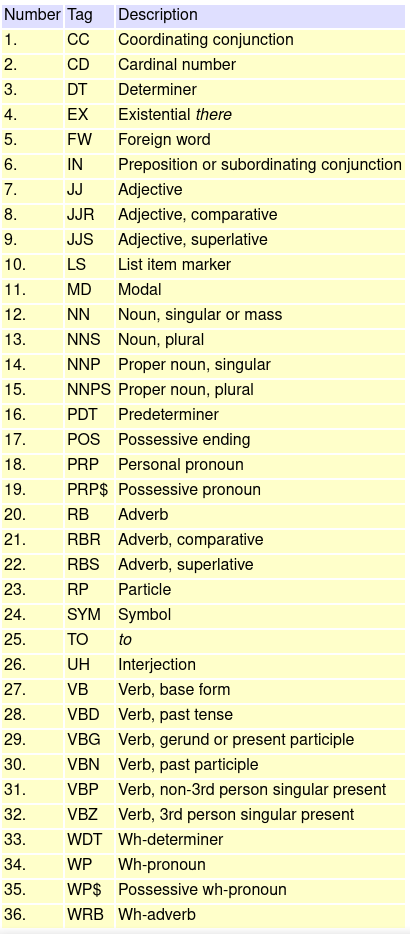

Here, we create a new variable containing the list of the words of the tweets and the POS tags associated to each one (by the "pos_tag" tagger from the nltk module of python).

In [ ]:
x = 'pos_tags'
units = 'pos tags'
train[x] = train.text.apply(lambda x: pos_tag(word_tokenize(x)))

In [ ]:
train[['text', x, 'target']].head()

# **V.7.1 Plural common nouns** <a id='V.7.1'></a>
<br>

Here, we will study the influence of the number of words that are plural common nouns in tweets. <br>
<br>
In the Penn Treebank tagset, the tag "NNS" stands for plural common nouns.

In [ ]:
x = 'NNS_count'
units = 'NNS'
train[x] = train.pos_tags.apply(lambda x : len([z for z in x if z[1] == 'NNS']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(6))

In [ ]:
marginal_tweets_count(x, units, 5)

In [ ]:
plot_disaster_frequency_by_x(x, groupby_x(x), xlim=(0,5), annotate=True)

The frequency of disaster clearly increases with the number of plural common nouns.<br>
<br>
As more than half of the tweets do not have any plural common noun (at least, not one identified by our tagger), it is still meaningful to study the influence of the presence of plural common nouns.

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

# **V.7.2 Singular proper nouns** <a id='V.7.2'></a>
<br>

In the Penn Treebank tagset, the tag "NNP" stands for singular proper nouns.

In [ ]:
x = 'NNP_count'
units = 'NNP'
train[x] = train.pos_tags.apply(lambda x : len([z for z in x if z[1] == 'NNP']))
print_quick_stats(x, units)

In [ ]:
distribution(x)

In [ ]:
marginal_tweets_count(x, units, 15)

In [ ]:
plot_disaster_frequency_by_x(x, groupby_x(x), xlim=(0,15), annotate=True)

The frequency is small for the tweets without any NNP. For those with 1 to 9 NNP, it is slightly above the average. For those with more than 10 NNP, the frequency go down, but there are too few such tweets for us to be confident in this last statement. <br>
<br>
Roughly, we can summarise this tendency by saying that the tweets without any plural proper noun are less likely to relate real disasters.

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

# **V.7.3 Past tense verbs** <a id='V.7.3'></a>
<br>

In the Penn Treebank tagset, the tag "VBD" stands for past tense verb.

In [ ]:
x = 'VBD_count'
units = 'VBD'
train[x] = train.pos_tags.apply(lambda x : len([z for z in x if z[1] == 'VBD']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(7))

In [ ]:
marginal_tweets_count(x, units, 3)

In [ ]:
plot_disaster_frequency_by_x(x, groupby_x(x), xlim=(0,3), annotate=True)

The tweets with past tense verbs are slightly more prone to relate disasters.

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

That corroborates the hypothesis we made when we analysed the n-grams occurences. Nevertheless, the effect is particularly small.<br>
<br>
The rest of this part is a bit repetive. So you can directly jump to the conclusion (part V.7.12) to have a summarize of the results.<br>
<br>

# **V.7.4 Past participle verbs** <a id='V.7.4'></a>
<br>

In the Penn Treebank tagset, the tag "VBN" stands for past participle verbs.

In [ ]:
x = 'VBN_count'
units = 'VBN'
train[x] = train.pos_tags.apply(lambda x : len([z for z in x if z[1] == 'VBN']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(5))

In [ ]:
plot_disaster_frequency_by_x(x, groupby_x(x), vline=False)

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

The interpretation is exactly the same as the latest one.<br>
<br>

# **V.7.5 Non-3rd person singular present verbs** <a id='V.7.5'></a>
<br>

In the Penn Treebank tagset, the tag "VBP" stands for non-3rd person singular present verbs.

In [ ]:
x = 'VBP_count'
units = 'VBP'
train[x] = train.pos_tags.apply(lambda x : len([z for z in x if z[1] == 'VBP']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(6))

In [ ]:
plot_disaster_frequency_by_x(x, groupby_x(x), vline=False)

Here, we got a rather regular tendence. The frequency tend to decrease with the use of non-3rd person singular present verbs.<br>
<br>
Most of the tweets have no VBP. So, as before, it is more appropriate to check the impact of the presence of VBP.

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

<br>

# **V.7.6 Modals** <a id='V.7.6'></a>
<br>

In the Penn Treebank tagset, the tag "MD" stands for modal auxiliary. Examples of words falling into this POS tags are "can", "cannot", "could", "may", "might", "should" and "would".

In [ ]:
x = 'MD_count'
units = 'MD'
train[x] = train.pos_tags.apply(lambda x : len([z for z in x if z[1] == 'MD']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(5))

In [ ]:
plot_disaster_frequency_by_x(x, groupby_x(x), annotate=True)

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

<br>

# **V.7.7 Personnal pronouns** <a id='V.7.7'></a>
<br>

In the Penn Treebank tagset, the tag "PRP" stands for personal pronoun.

In [ ]:
x = 'PRP_count'
units = 'PRP'
train[x] = train.pos_tags.apply(lambda x : len([z for z in x if z[1] == 'PRP']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(7))

In [ ]:
marginal_tweets_count(x, units, 6)

In [ ]:
plot_disaster_frequency_by_x(x, groupby_x(x), xlim=(0,6), annotate=True)

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

<br>

# **V.7.8 Possessive pronouns** <a id='V.7.8'></a>
<br>

In the Penn Treebank tagset, the tag "PRP$" stands for possessive pronoun.

In [ ]:
x = 'PRP$_count'
units = 'PRP$'
train[x] = train.pos_tags.apply(lambda x : len([z for z in x if z[1] == 'PRP$']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(7))

In [ ]:
plot_disaster_frequency_by_x(x, groupby_x(x), vline=False)

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

<br>

# **V.7.9 Adverbs** <a id='V.7.9'></a>
<br>

In the Penn Treebank tagset, the tag "RB" stands for adverbs.

In [ ]:
x = 'RB_count'
units = 'RB'
train[x] = train.pos_tags.apply(lambda x : len([z for z in x if z[1] == 'RB']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(8))

In [ ]:
marginal_tweets_count(x, units, 4)

In [ ]:
plot_disaster_frequency_by_x(x, groupby_x(x), data=train, xlim=(0,4), annotate=True)

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

<br>

# **V.7.10 Wh-adverbs** <a id='V.7.10'></a>
<br>

In the Penn Treebank tagset, the tag "WRB" stands for Wh-adverb. Examples of what is called Wh-adverbs in this context are : "how", "however", "whence", "whenever", "where", "whereby", "whereever", "wherein", "whereof", and "why".

In [ ]:
x = 'WRB_count'
units = 'WRB'
train[x] = train.pos_tags.apply(lambda x : len([z for z in x if z[1] == 'WRB']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(4))

In [ ]:
marginal_tweets_count(x, units, 2)

In [ ]:
plot_disaster_frequency_by_x(x, groupby_x(x), data=train, xlim=(0,2), annotate=True)

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

<br>

# **V.7.11 Interjections** <a id='V.7.11'></a>
<br>

In the Penn Treebank tagset, the tag "UH" stands for interjections.

In [ ]:
x = 'UH_count'
units = 'UH'
train[x] = train.pos_tags.apply(lambda x : len([z for z in x if z[1] == 'UH']))
print_quick_stats(x, units)

In [ ]:
distribution_annotated(x, xaxis=range(3))

In [ ]:
frequencies_by_x_presence(x, units)

In [ ]:
chi2_tests.loc[units + ' presence'] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

<br>

# **V.7.12 Conclusion** <a id='V.7.12'></a>
<br>

In [ ]:
chi2_tests.iloc[13:,:].sort_values(by='Cohen_d', ascending=False)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We conclude the tweets with singular proper nouns, plural nouns, past tense verbs and past participle verbs are more prone to relate disasters. Those with personal pronouns, possessive pronouns, modals, adverbs, non-3rd person singular present verbs, interjections, and Wh-adverbs are less prone to relate disasters.<br>
<br>

# **V.8 Characters** <a id='V.8'></a>

# **V.8.1 Capital letters** <a id='V.8.1'></a>
<br>

Here, we will study the impact of the number of capital letters. But, before computing the amount of capital letters, we will remove the mentions. Indeed, they sometimes contain capital letters, so their presence could bias a little bit the analysis.

In [ ]:
x = 'uppercases_count'
units = 'capital letters'
remove_mentions = lambda x:re.sub(r"@[A-Za-z0-9]+", "", x)
train[x] = train.text.apply(remove_mentions).apply(lambda x : len([z for z in x if z.isupper()]))

print_quick_stats(x, units)

In [ ]:
distribution(x)

We restraint the abscissa of the following chart between 0 and 20 as the interpolation is not reliable for larger capital letters counts.

In [ ]:
plot_disaster_frequency_by_x(x, groupby_x(x), xlim=(0,20), vline=False)

Generally, the tweets with less than 3 capital letters are less prone to relate real disasters. The frequency of disasters is above the average for tweets with more than 3 capital letters.<br>

Therefore, let's test the impact of having more than 3 capital letters.

In [ ]:
x = 'more_than_3_uppercases'
train[x] = (train.uppercases_count>3).apply(int)

In [ ]:
frequencies_by_x_presence(x, units='more than 3 capital letters', xticklabels=['< 3', '> 3'])

In [ ]:
chi2_tests.loc[x] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

# **V.8.2 Minuscules** <a id='V.8.2'></a>

In [ ]:
x = 'lowercases_count'
units = 'lowercase characters'
train[x] = train.text.apply(remove_mentions).apply(lambda x : len([z for z in x if z.islower()]))
print_quick_stats(x, units)

In [ ]:
distribution(x)

In [ ]:
plot_disaster_frequency_by_x(x, groupby_x(x), vline=False)

The tweets with less than 40 lowercase characters are generally less prone to relate real disasters. Those with more than 40 and less than 100 lowercase characters have a frequency of disasters above the average. The effect is less clear for larger amounts, but it seems the tweets with more than 100 lowercase characters are also less prone to relate real disasters. 

In [ ]:
x = 'more_than_40_lowercase characters'
train[x] = (train.lowercases_count>40).apply(int)

In [ ]:
frequencies_by_x_presence(x, units='more than 40 lowercase characters', xticklabels=['< 40', '> 40'])

In [ ]:
chi2_tests.loc[x] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

# **V.8.3 All characters** <a id='V.8.3'></a>
<br>
After the uppercases and lowercases count, let's have a look at the total numbers of characters. This metric can be seen as another way to define the tweets lengths (that we previously define by the number of tokens).

In [ ]:
x = 'characters_count'
units = 'characters'
train[x] = train.text.apply(remove_mentions).apply(lambda x : len([z for z in x if z.islower()|z.isupper()])) # We do not just compute len(x) because it would consider the whitespaces as characters.
print_quick_stats(x, units)

In [ ]:
distribution(x)

In [ ]:
plot_disaster_frequency_by_x(x, groupby_x(x), vline=False)

The last chart is self explanatory.<br>
Let's check the influence of having more than 40 characters.

In [ ]:
x = "more_than_40_characters"
units = "more than 40 characters"
train[x] = (train.characters_count>40).apply(int)

In [ ]:
frequencies_by_x_presence(x, units='more than 40 characters', xticklabels=['< 40 characters', '> 40 characters'])

In [ ]:
chi2_tests.loc[x] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

The amount of characters is linked to the number of words. Therefore, we could study the average number of characters by word in each tweet. I have achieved this (by dividing the character_count feature by the tweet_lengths feature), but the obtained variable has really no link with the frequency of disasters. That's why the results of this are not displayed here.

# **V.8.4 Start with a capital letter** <a id='V.8.4'></a>
<br>

A properly written tweet should start with a capital letter. Let's wonder if such tweets tend to relate real disasters more often than others.

In [ ]:
x = "Start_with_capital_letter"
units = "Start with capital letter"
train[x] = train.text.apply(remove_mentions).apply(lambda x: x[0].isupper()).apply(int)

In [ ]:
distribution_annotated(x, range(2))

In [ ]:
frequencies_by_x_presence(x, units='first character in uppercase', xticklabels=[units, 'don\'t ' + units])

In [ ]:
chi2_tests.loc[x] = chi2_test_with_effect_size(x)
pd.DataFrame(chi2_tests.iloc[-1,:]).T

# **V.8.5 Conclusion** <a id='V.8.5'></a>

In [ ]:
chi2_tests.iloc[-4:,:].sort_values(by='Cohen_d', ascending=False)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Tweets with more than 40 characters tend to relate more often real disasters. That is also true if we only consider the lowercase characters. Besides, the tweets beginning with a capital letter or those containing more than 3 capital letters are also more prone to deal with actual disasters.<br>
<br>

# **V.9 Correlations** <a id='V.9'></a>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Here is a heatmap of the spearman correlations between the numerical variables of the training set after the previous analysis (so with all the features we created).<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Note that on this chart, the darker squares do not relate correlations equal to -1 (as we could expect) but the smaller correleation of our variables, that is slightly inferior to 0.4 (see the color scale on the right of the plot).

In [ ]:
f, ax = plt.subplots(figsize=(30, 15))
ax = sbn.heatmap(train.corr('spearman'), cmap=plt.cm.gray)

Let's focuse on the correlations whose the absolute value is above 0.5.

In [ ]:
correlations = pd.DataFrame({}, columns=['correlations'])
for i in range(train.corr('spearman').shape[0]-1):
  for j in range(i+1, train.corr('spearman').shape[0]):
    if (np.abs(train.corr('spearman').iloc[i,j]) > 0.5):
      correlations.loc[train.corr('spearman').columns[i]+'_'+train.corr('spearman').columns[j]] = train.corr('spearman').iloc[i,j]

In [ ]:
correlations.sort_values(by='correlations', ascending=False)

Most of the correlations do not reveal anything we did not already know.<br>

*   The link between the tweet length and the tweet length without stop words is obvious.<br>
*   The relationship between the amount of words and the amount of characters is evident too.<br>
*   Another obvious one is the link between the number of characters and the number of lowercase letters.<br>
*   As proper nouns begin with a capital letter, the proper noun counts is linked to the uppercases count.<br>
*   The stop words list we used contains some verbal forms as "am", "is", "are", "has" or "does" because they bring few information. Hence the correlation between the stop words count and the personnal pronouns count.<br>
*   The relationship between the tweet length and the stop words count is not surprising because, generally, more words a tweet contains, more stop words it will contain. <br>
*   It is expected that the amount of verbs increases with the use of personnal pronouns. So it is unsurprising that the use of non-3rd person singular present verbs increases with the use of personnal pronouns.<br>
*   The tweets with mentions start less often with a capital letter. That is explained by the fact the mention are generally at the beginning of the tweets. Although we looked at the first character after having removed the mentions, the user of Tweeter generally do not use a capital letter as first character after a mention.<br>
<br>

Another correlation is more meaningful.<br>

*   The tweet length decreases when the URL count increases. Remember that the tweet length has been computed after removing the URL. Hence, this reveals that, generally, more a tweet contains URL, less it will contain text in addition.<br>

# **VI General conclusion** <a id='VI'></a>
<br>

Several syntheses cover previous parts of this notebook. Here, we will try to synthesize these previous syntheses. So this conclusion is not exhaustive at all. Much more information is available in this notebook.<br>
<br>
Here are some observations that can summarize our analysis.<br>
<br>
*   Disaster tweets are generally written in a more formal language. They begin more often with a capital letter. They contain more characters (both minuscules and capital letters), colons, hyphens, and dots (particularly ellipsis).
*   The disaster tweets tend to contains less pronouns and more proper nouns. When people tweet about a real disaster, they use proper noun to evoke the place, the name of somebody or something (like an airplane) implied in the disaster, the name of a speaker (as a president, for example) relating the disaster, the name of the disaster (natural disaster, like storm, often have a name).
*   Disaster tweets contain more URL. The users dealing with disasters often back up their tweets with hyperlinks pointing to newspaper articles.
*   Disaster tweets contain more hashtags.
*   Unsurprisingly, the vocabulary of disaster tweets is darker (with words like "bomb", "suicide") than the one of non disaster tweets (which contains more joyful terms as "love" and neutral terms as "day").
<br>

*   The tweets expressing emotions are less likely to relate disasters. Emotions can be expressed by the use of a particular vocabulary ("feel", "love", "like", "seem", etc.) but also by the use of some punctuation marks as exclamation point, asterisks (by the focuse they imply on some part of the tweet) or question marks.
*   Disaster tweets contain less modals. Modals are generally used to express uncertainty. Therefore, when a disaster is recognized, we usually do not use modals.<br>
<br>

Tables resulting from our analysis are made available at the end of the notebook thanks to the following lines of code.

In [ ]:
train.to_csv('modified_train', index=False)
test.to_csv('modified_test', index=False)
contractions_detected.reset_index().rename(columns={'index':'Contractions'}).to_csv('contractions_detected', index=False)
chi2_tests.reset_index().rename(columns={'index':'variables'}).sort_values(by='Cohen_d', ascending=False).to_csv('chi2_tests', index=False)
correlations.reset_index().rename(columns={'index':'pairs of variables'}).sort_values(by='correlations', ascending=False).to_csv('correlations', index=False)

# **VII Potential extensions** <a id='VII'></a>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In this part, we will evoke some possible extensions of our analysis. The word "extension" should not be understood in the sense of "what should we do next this EDA to produce a predictive model" (what I will do in another notebook) but in the sense "how could we improve the present EDA".

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We could extend this EDA in many ways. We could for example use other tokenizers, other sets of stop words, other tagsets, other statistical tests, other effect size mesures, and other metrics to monitor. We could also apply other cleaning (like spell checking the text variable) and feature engineering. Furthermore, traning models in order to study their outputs, the kind of errors they make, and how they use each variable can be an efficient way to get a better understanding of the data.<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; An example of another metric to monitor could be the number of spelling mistakes. To compute this metric would require either to use a spellchecker, either to define a set of spelling mistakes to check for. Another metric could be the number of contractions, as corrected during the cleaning part of this notebook. Or the number of time a tweet is duplicated. <br>
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We could also apply different feature engineering techniques to the variables we created. In this notebook, we studied the POS tags occurences. Another metric could be the porportion of each POS tag in each tweet. For example, the proportion of plural common nouns in a tweet would be the number of plural common nouns divided by the number of words in this tweet.  Thus, we could analyze the frequency of disasters in term of the porportions instead of occurences.<br>
Indeed, if the number of plural common nouns in tweets tend to be positively correlated with the tweet length, then the influence we associate to the number of plural common nouns could actually be only due to the fact tweets with numerous plural common nouns are the long ones. <br>
As we already studied the impact of the number of words, we don't want it to influence the analysis of the POS tags. That would be the rationale behind that choice. <br>

Nevertheless, there is some pitfalls with this approach.

*   Firstly, even when the tweet length is positively correlated with the count of a particular POS tag count, the correlation is often low. An example is the correlation between the tweet length and the singular proper nouns count (the Spearman correlation is roughly equal to 10%). 
*   Secondly, the link between the tweet length and a particular POS tag count is sometimes not monotone, leading to a correlation close to zero. We can imagine that the user of Tweeter use more often some categories of words in short tweets than in longer tweets. 

Hence, to study the POS tags counts grasps an information that is different than the one provided by the POS tags proportions.<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The idea of divided the counts by the tweet length could also be done with other features, like the URL count or the stop words count. Furthermore, the particular punctuation marks (like question marks, exclamation marks, etc.) counts in each tweet could be divided by the total number of punctuation marks in the tweet. <br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The interactions could possibly be studied by analyzing tree-based algorithm (like gradient boosted trees). Maybe the simultaneous presence of particular a punctuation mark and a particular POS tag would explain well one of the characteristics of the disaster tweets.<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The possible extensions presented here are just few ideas. The list is not exhaustive. But this notebook already go far beyond what is commonly done on Kaggle. So I let you find other interesting metrics for an data analysis.<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; I will soon publish a second notebook on this competition. Given that this notebook consist in an EDA, without anything about modeling, the next one will mainly consist in the implementation of a predictive model.<br>
<br>

# **VIII Bibliographic references** <a id='VIII'></a>
<br>


This bibliography aims to point the reader to appropriate sources covering some concepts used in this notebook. They are provided with links to simplify the potential searches of the reader.<br>
<br>

* Books

[All of statistics, by Larry Wasserman (Springer).](https://www.amazon.com/All-Statistics-Statistical-Inference-Springer/dp/0387402721/ref=sr_1_1?ie=UTF8&qid=1249141007&sr=8-1) This book is an introductory book on statistics which cover a broad range of topics. In particular, it covers the chi-squared test of independence I used (with examples) and others.<br>
<br>
[Deep Learning with Python, by François Chollet (Manning).](https://www.manning.com/books/deep-learning-with-python)<br>
<br>
[The truthful art, by Alberto Cairo (New Riders).](https://www.amazon.com/Truthful-Art-Data-Charts-Communication/dp/0321934075/ref=sr_1_1?crid=37BCVGMGPJWAV&dchild=1&keywords=the+truthful+art+alberto+cairo&qid=1599306491&s=books&sprefix=the+truthful+art+al%2Cstripbooks-intl-ship%2C230&sr=1-1)<br>
<br>
[The visual display of quantitative information, by Edward Tufte.](https://www.amazon.com/Visual-Display-Quantitative-Information/dp/0961392142/ref=sr_1_1?crid=376B4YP1NAPB5&dchild=1&keywords=edward+tufte&qid=1599306664&s=books&sprefix=Edward+tufte%2Cstripbooks-intl-ship%2C239&sr=1-1)<br>
<br>

* Articles

[Intelligent Signals : Visualising Data.](https://medium.com/marax-ai/intelligent-signals-visualising-data-df9152c10b00) <br>
<br>
[Ten Simple Rules for Better Figures.](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)<br>
<br>
Simply put: here are the Wikipedia articles about [Chi-squared tests](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test) and [Effect size, and in particular Cohen's d](https://en.wikipedia.org/wiki/Effect_size#Cohen's_d). <br>
<br>
<br>
<br>
Thanks for reading. I hope you have taken as pleasure by reading this notebook as I have taken by writing it.<br>
<br>
If this notebook pleased you in any way, or learned you anything, you can upvote it. As I plan to write other notebooks in the future, you can also follow me to be informed when that will happen.